#Numerical regression

in this example we will use Keras to predict wages based on various professional and demographic factors.

In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/atrium_SDA+ASE_regression_analysis-20220530/atrium_SDA+ASE_v2_2969_samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
data.dropna(inplace=True)

FileNotFoundError: ignored

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2969 non-null   float64
 1   typicalFacadeWindowWidth   2969 non-null   int64  
 2   groundFacadeGlazingRatio   2969 non-null   float64
 3   groundFacadeWindowWidth    2969 non-null   int64  
 4   buildingDepth              2969 non-null   int64  
 5   balconyWidth               2969 non-null   int64  
 6   atriumArea                 2969 non-null   int64  
 7   aspectRatio                2969 non-null   float64
 8   groundFloorHeight          2969 non-null   float64
 9   typicalfloorHeight         2969 non-null   float64
 10  numberLevels               2969 non-null   int64  
 11  groundSDA                  2969 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2969 non-null   float

In [ ]:
data.shape

(2969, 15)

In [ ]:
#data.drop(columns=["roofArea","buildingHeight"], inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  2969 non-null   float64
 1   typicalFacadeWindowWidth   2969 non-null   int64  
 2   groundFacadeGlazingRatio   2969 non-null   float64
 3   groundFacadeWindowWidth    2969 non-null   int64  
 4   buildingDepth              2969 non-null   int64  
 5   balconyWidth               2969 non-null   int64  
 6   atriumArea                 2969 non-null   int64  
 7   aspectRatio                2969 non-null   float64
 8   groundFloorHeight          2969 non-null   float64
 9   typicalfloorHeight         2969 non-null   float64
 10  numberLevels               2969 non-null   int64  
 11  groundSDA                  2969 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2969 non-null   float

In [ ]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

typicalFacadeGlazingRatio min_val 0.7 max_val 0.9
typicalFacadeWindowWidth min_val 2 max_val 4
groundFacadeGlazingRatio min_val 0.7 max_val 0.9
groundFacadeWindowWidth min_val 2 max_val 4
buildingDepth min_val 15 max_val 40
balconyWidth min_val 1 max_val 6
atriumArea min_val 1000 max_val 3900
aspectRatio min_val 0.5 max_val 1.5
groundFloorHeight min_val 3.0 max_val 6.0
typicalfloorHeight min_val 2.5 max_val 3.0
numberLevels min_val 1 max_val 10
groundSDA min_val 26.1 max_val 100.0
firstSDA min_val 15.2 max_val 100.0
groundASE min_val 5.6 max_val 64.4
firstASE min_val 5.0 max_val 34.4


##Prepare Data

**NORMALIZE INPUTS**

In [ ]:
#same code as last time

#declare features
#X = data.iloc[:,1:-1]
X = data[["typicalFacadeGlazingRatio", "typicalFacadeWindowWidth", "groundFacadeGlazingRatio", "groundFacadeWindowWidth", "buildingDepth", "balconyWidth", "atriumArea", "aspectRatio", "groundFloorHeight", "typicalfloorHeight", "numberLevels"]]   

# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(2969, 11)


In [ ]:
#declare regression target
#y = data.loc[:,"wage_per_hour"].to_numpy()
y = data.loc[:, ["groundSDA", "firstSDA", "groundASE", "firstASE"]].to_numpy()

#y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)


**SPLIT INTO TRAIN AND TEST**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (2375, 11) output (2375, 4)
TEST input (594, 11) output (594, 4)
[[-1.41833572  1.23702318 -1.42131337 ... -0.0087625  -0.996079
   0.19597594]
 [-0.01043243  1.23702318 -0.01702738 ... -0.35875156  0.33606449
  -0.152022  ]
 [-1.41833572  0.00497963 -0.01702738 ... -0.0087625   0.33606449
  -0.50001994]
 ...
 [-1.41833572  1.23702318 -0.01702738 ...  0.10790052  1.00213624
  -0.152022  ]
 [ 1.39747087 -1.22706392 -1.42131337 ...  0.5745526   1.66820799
  -0.152022  ]
 [-1.41833572 -1.22706392 -0.01702738 ...  1.04120468 -0.33000725
  -0.50001994]]
[[0.88362652 0.14504717 0.22619048 0.17006803]
 [0.42489851 0.22523585 0.23129252 0.21088435]
 [0.42219215 0.09080189 0.15816327 0.02721088]
 ...
 [0.50879567 0.15330189 0.20408163 0.11904762]
 [0.56833559 0.16037736 0.19217687 0.18027211]
 [1.         0.28891509 0.39285714 0.23469388]]


#Build model

From the cheatSheet
Regression between 0 and 1>> 
      activation = relu for hidden layers / sigmoid for final layer
      loss = mean squared error
      optimizer = adam
      input from data, is 8 columns
      output is 1 value prediction

In [ ]:
# Instantiate a sequential model
#tf.seed(5)
#model.save()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(32, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
  
# Add a dense layer with 1 value output
#model.add(tf.keras.layers.Dense(1, activation= "linear"))
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 3

#Train model

In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=200, validation_split=0.2)

Epoch 1/200
60/60 [==============================] - 1s 6ms/step - loss: 0.1655 - val_loss: 0.1564
Epoch 2/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1602 - val_loss: 0.1552
Epoch 3/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1594 - val_loss: 0.1546
Epoch 4/200
60/60 [==============================] - 0s 4ms/step - loss: 0.1589 - val_loss: 0.1543
Epoch 5/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1587 - val_loss: 0.1542
Epoch 6/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1586 - val_loss: 0.1540
Epoch 7/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1585 - val_loss: 0.1540
Epoch 8/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1584 - val_loss: 0.1539
Epoch 9/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1583 - val_loss: 0.1538
Epoch 10/200
60/60 [==============================] - 0s 3ms/step - loss: 0.1583 - val_loss: 0.1538
Epoch 11/

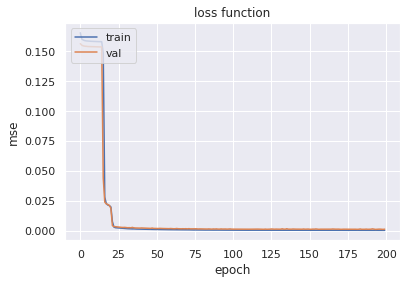

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data



In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.0015
mse_test: 0.0014916268410161138


#Plot error


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

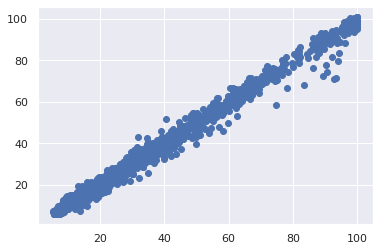

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)

In [ ]:
#RADIATION PREDICTIONS
y_pred_01 = y_pred[:,0]
print(y_pred_01.shape)

(594,)


In [ ]:
#RADIATION TRUTH
y_truth_01 = y_truth[:,0]
print(y_truth_01.shape)

(594,)


[4. 4. 4. 2. 2. 4. 2. 4. 4. 4. 2. 4. 3. 3. 4. 4. 3. 4. 3. 3. 3. 3. 2. 3.
 3. 2. 4. 2. 2. 4. 3. 2. 4. 4. 3. 2. 2. 3. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2.
 2. 4. 2. 2. 2. 4. 2. 3. 4. 3. 4. 3. 4. 4. 3. 3. 2. 2. 3. 2. 4. 4. 4. 3.
 3. 3. 2. 4. 3. 3. 4. 4. 3. 4. 4. 2. 4. 3. 4. 4. 2. 2. 3. 2. 4. 2. 4. 3.
 4. 3. 3. 3. 2. 2. 3. 2. 3. 2. 4. 3. 2. 4. 2. 4. 2. 3. 2. 2. 2. 4. 4. 2.
 3. 4. 4. 3. 2. 3. 3. 4. 4. 3. 4. 3. 2. 2. 3. 2. 2. 2. 4. 2. 4. 3. 2. 4.
 3. 4. 3. 2. 3. 4. 2. 4. 3. 3. 3. 4. 2. 3. 3. 2. 2. 3. 4. 2. 4. 2. 4. 2.
 4. 4. 2. 4. 3. 4. 4. 2. 2. 3. 3. 3. 3. 4. 4. 3. 4. 2. 2. 2. 3. 4. 3. 4.
 2. 2. 4. 3. 4. 3. 2. 2. 4. 3. 4. 4. 2. 3. 4. 4. 3. 3. 3. 3. 3. 3. 2. 4.
 4. 3. 3. 3. 3. 3. 4. 4. 3. 4. 4. 2. 3. 2. 4. 3. 3. 2. 3. 2. 2. 4. 4. 2.
 3. 2. 4. 4. 2. 3. 4. 3. 4. 3. 3. 2. 3. 4. 3. 2. 3. 4. 2. 3. 4. 2. 3. 4.
 4. 3. 3. 3. 3. 3. 4. 4. 4. 3. 3. 3. 3. 4. 3. 4. 4. 2. 2. 4. 3. 3. 4. 4.
 4. 3. 3. 2. 4. 4. 4. 3. 4. 3. 2. 4. 4. 4. 4. 3. 2. 3. 3. 2. 3. 2. 4. 2.
 3. 3. 2. 4. 2. 3. 2. 3. 3. 3. 4. 2. 2. 4. 2. 2. 4.

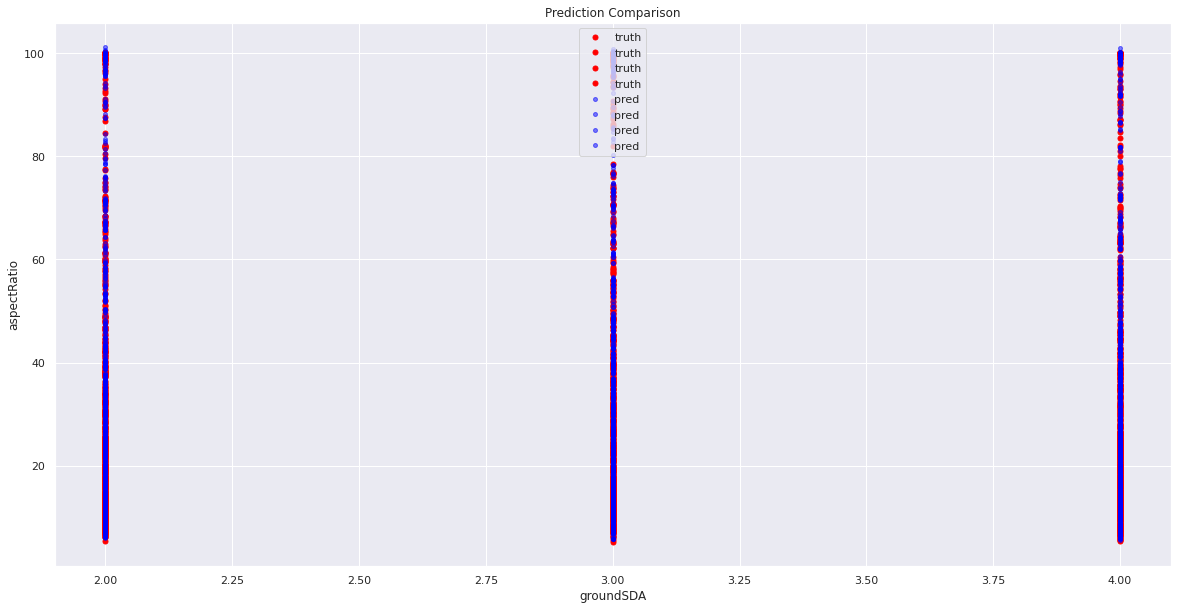

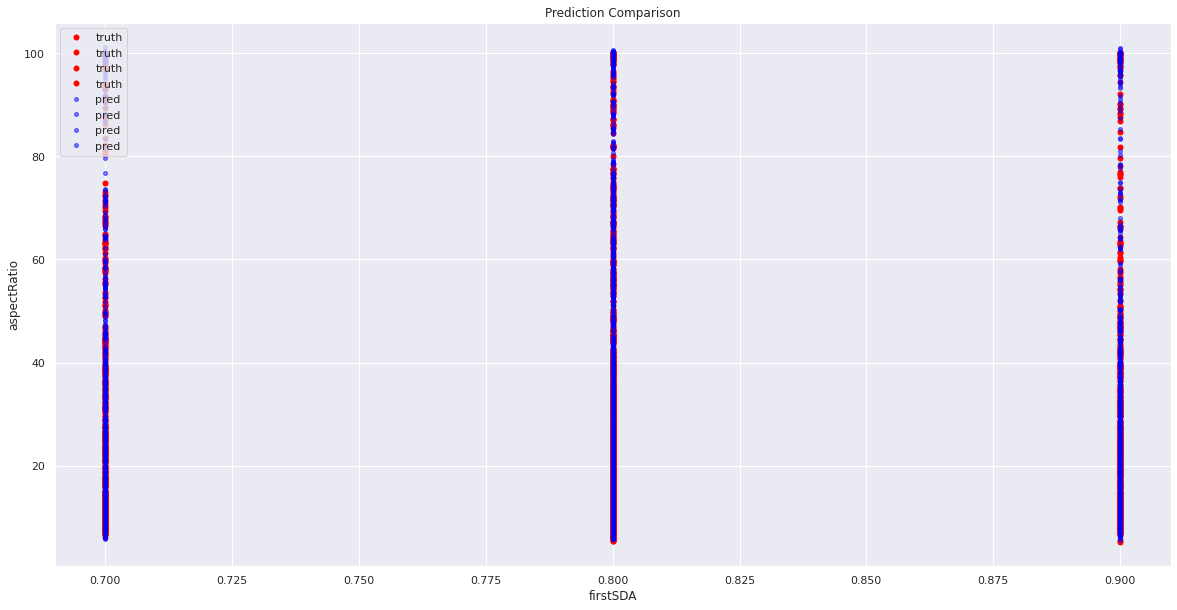

In [ ]:
age_test = (scalerX.inverse_transform(X_test)[:,3])
print(age_test)

exp_test = (scalerX.inverse_transform(X_test)[:,2])

plot_comparison(age_test, y_pred, y_truth, "groundSDA", "aspectRatio")
plot_comparison(exp_test, y_pred, y_truth,  "firstSDA", "aspectRatio")

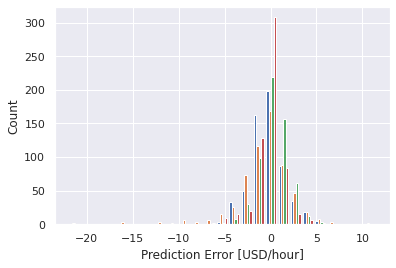

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [USD/hour]')
_ = plt.ylabel('Count')